# CLASS: CSE7345
# NAME: Randeep Hanspal
# SMUID: 47812509
# QUEST5. Pandas 2

## Part A. States and area codes

In [66]:
#basic imports
import pandas as pd
import numpy  as np

In [67]:
#Create DF From CSV File
df = pd.read_csv('states.areacodes.csv')
#lets print df in asc order after dropping the duplicate column values
df = df.sort_values(by='Area code', ascending=True)

In [68]:
#list of non US states
nonUsState = ['Washington,DC','American Samoa','Guam','Northern Mariana Islands',
              'Puerto Rico', 'U.S. Virgin Islands','Baker Island','Howland Island',
              'Jarvis Island','Johnston Atoll','Kingman Reef','Midway Atoll',
              'Navassa Island','Palmyra Atoll','Wake Island']
# use isin to check if each element in the DataFrame is contained in values
#remove the non-state from df
df = df[~df['State'].isin(nonUsState)]

In [69]:
#sorted the State column 
orderedDf = df.sort_values('State', ascending=True)

#use lambda to sort the states that has exactly one area code
groupbyState=orderedDf.groupby(['State']).filter(lambda groupbyState: len(groupbyState)==1)

#lets print the final output
groupbyState.groupby(['State']).size()

State
Alaska           1
Delaware         1
Hawaii           1
Idaho            1
Maine            1
Montana          1
New Hampshire    1
New Mexico       1
North Dakota     1
Rhode Island     1
South Dakota     1
Vermont          1
West Virginia    1
Wyoming          1
dtype: int64

## Part B. Zipcodes and States

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
#load data
df2 = pd.read_csv('zipcodes.states.gps.csv')

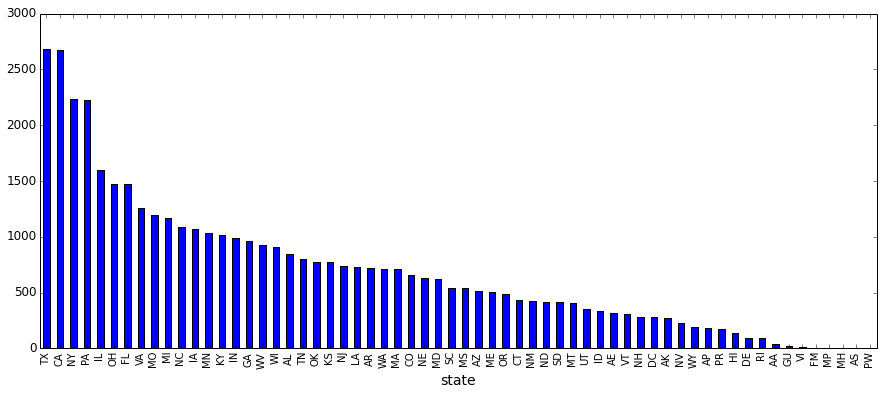

In [71]:
#grouping by the column state
groupby_state = df2.groupby(['state'])
groupby_state.size()

#customizing the bar chart
plt.rcParams['figure.figsize'] = (15,6)
plt.xlabel('X label size', size = 14)
plt.yticks(size = 15)
plt.yticks(size = 12)

#lets plot the bar chart
groupby_state.size().sort_values(ascending=False).plot(kind='bar')

## Part C. Films

In [72]:
#Create DF From CSV File
df = pd.read_csv('films2.csv')
#replace the column name Westerns with Western
df = df.replace('Westerns','Western')

In [73]:
# add a new column with name as nFilms
df = df.groupby(["Subject","Actor"]).size().reset_index(name="nFilms")

# remove the entries with value as 1
df = df[df.nFilms > 1]

# find the max nFilms from each Subject 
# use idxmax to find the index of first occurrence of maximum value
df=df.loc[df.groupby(["Subject"],sort=False)["nFilms"].idxmax()][["Subject","Actor","nFilms"]]
df

,Subject,Actor,nFilms
15,Action,"Connery, Sean",15
321,Comedy,"Sellers, Peter",22
399,Drama,"Brando, Marlon",17
739,Horror,"Ford, Wallace",3
822,Mystery,"Connery, Sean",3
915,Science Fiction,"Hamill, Mark",3
956,War,"Wayne, John",10
996,Western,"Wayne, John",46


## Part D. Stock Trading Algorithm with Moving Averages (MA)

In [74]:
#Create DF From CSV File
df = pd.read_csv('SPY.histdata.csv', parse_dates=['Date'])
df = df.sort_values(by='Date')

In [75]:
df['MA100'] = df['SPY'].rolling(100).mean()

In [76]:
dfWithoutNa = df.dropna()
dfSorted = dfWithoutNa.sort_values(by='Date')
dfSorted.head()

,Date,SPY,MA100
4602,2000-05-24,99.5118,101.376287
4601,2000-05-25,97.8044,101.325023
4600,2000-05-26,97.9153,101.315119
4599,2000-05-30,101.1082,101.335375
4598,2000-05-31,101.3300,101.373773


In [77]:
#start value is $1000
balance=1000
stockVal = 0
# iterate over index and row
for index, row in dfSorted.iterrows():
    if index == 0 and stockVal > 0: 
        balance = stockVal * row['SPY']
        print ("Balance:", balance)
        stockVal = 0
    else:
        if stockVal ==0 :
        #compare if spy value is greater than MA
            if row['SPY'] > row['MA100']: 
                print ("--Buy Stock--")
                print("Spy Value:", row['SPY'])
                print ("MA Value:", row['MA100'])
                stockVal = balance/row['SPY']
                print("Stock Value:", stockVal)
                balance = 0
                print ("Balance:", balance)
        else :
            if row['SPY'] < row['MA100']: 
                print ("--Sell Stock--")
                print("Spy Value:", row['SPY'])
                print ("MA Value:", row['MA100'])
                balance = stockVal * row['SPY']
                print ("Balance:", balance)
                stockVal = 0
finalBal = balance

--Buy Stock--
('Spy Value:', 103.1038)
('MA Value:', 101.37329000000011)
('Stock Value:', 9.698963568753042)
('Balance:', 0)
--Sell Stock--
('Spy Value:', 101.0573)
('MA Value:', 103.40980600000003)
('Balance:', 980.1510710565468)
--Buy Stock--
('Spy Value:', 104.1022)
('MA Value:', 103.64965600000004)
('Stock Value:', 9.415277208901895)
('Balance:', 0)
--Sell Stock--
('Spy Value:', 104.0964)
('MA Value:', 104.16598400000004)
('Balance:', 980.0964624487352)
--Buy Stock--
('Spy Value:', 98.5512)
('MA Value:', 98.28483600000007)
('Stock Value:', 9.945048486966524)
('Balance:', 0)
--Sell Stock--
('Spy Value:', 97.9934)
('MA Value:', 98.19196600000006)
('Balance:', 974.5491144027053)
--Buy Stock--
('Spy Value:', 98.6442)
('MA Value:', 98.11293800000007)
('Stock Value:', 9.879436544700097)
('Balance:', 0)
--Sell Stock--
('Spy Value:', 96.4057)
('MA Value:', 98.01308100000006)
('Balance:', 952.433995697394)
--Buy Stock--
('Spy Value:', 90.8281)
('MA Value:', 90.82779100000012)
('Stock Value:

--Sell Stock--
('Spy Value:', 98.7717)
('MA Value:', 100.15387300000003)
('Balance:', 917.6450528784587)
--Buy Stock--
('Spy Value:', 100.2356)
('MA Value:', 100.23210500000003)
('Stock Value:', 9.154881627669797)
('Balance:', 0)
--Sell Stock--
('Spy Value:', 98.9819)
('MA Value:', 100.22798200000003)
('Balance:', 906.167577781849)
--Buy Stock--
('Spy Value:', 100.09200000000001)
('MA Value:', 99.78704500000003)
('Stock Value:', 9.053346698855542)
('Balance:', 0)
--Sell Stock--
('Spy Value:', 99.4977)
('MA Value:', 99.79942600000004)
('Balance:', 900.787173838719)
--Buy Stock--
('Spy Value:', 100.1702)
('MA Value:', 99.80382800000005)
('Stock Value:', 8.992566390390746)
('Balance:', 0)
--Sell Stock--
('Spy Value:', 99.6463)
('MA Value:', 99.76844500000007)
('Balance:', 896.0759683067934)
--Buy Stock--
('Spy Value:', 100.6004)
('MA Value:', 99.68128300000004)
('Stock Value:', 8.90728037171615)
('Balance:', 0)
--Sell Stock--
('Spy Value:', 110.1921)
('MA Value:', 110.874603)
('Balance:',

In [78]:
#Buy Hold strategy
# first Spy value
spyValueBuy = dfSorted.iloc[0,1] 
print ("Spy value:",spyValueBuy)
# last Spy value
lastSpyValue = dfSorted.iloc[-1,1]
print ("Last Spy value:",lastSpyValue)

balance = 1000
stockVal = balance/spyValueBuy
balanceFirstBuyLastSale = stockVal * lastSpyValue
print ("Balance:", balanceFirstBuyLastSale)

('Spy value:', 99.511799999999994)
('Last Spy value:', 288.10000000000002)
('Balance:', 2895.1340444047846)


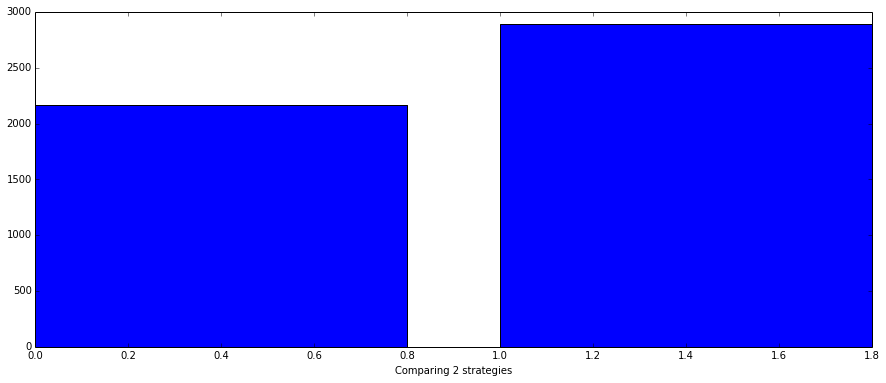

In [79]:
#plot the bar graph
import matplotlib.pyplot as plt
%matplotlib inline
#customizing the bar chart
plt.rcParams['figure.figsize'] = (15,6)
methods = ['method 1', 'method 2']
plt.xlabel("Comparing 2 strategies")
width = 2
plt.bar(range(len(methods)),[finalBal,balanceFirstBuyLastSale])
plt.show()